In [3]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import fetch_mldata
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import ShuffleSplit
import time
import numpy as np
import matplotlib.pyplot as plt


In [4]:
mnist = fetch_mldata('MNIST original')

In [5]:
def plot_curve(sizes, train_scores, test_scores,
               invert_score=True, title='', ylim=None):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    plt.grid(True)
    if invert_score:
        train_scores = 1-train_scores
        test_scores = 1-test_scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test error")
    plt.legend(loc="best")
    plt.show()


In [6]:
X, y = mnist.data, mnist.target
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
train_sizes=np.logspace(np.log10(.05), np.log10(1.0), 8)

Decision Tree with gini criterion executed in 1519.4217886924744 seconds


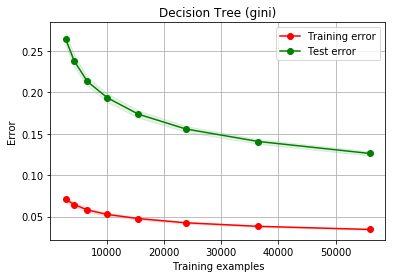

In [7]:
estimator = tree.DecisionTreeClassifier(criterion='gini',
                                        min_samples_split=2, 
                                        min_samples_leaf=3,
                                        class_weight=None)

tick = time.time()
train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=4, train_sizes=train_sizes)
tock = time.time()
print('Decision Tree with gini criterion executed in {} seconds'.format(tock-tick))

plot_curve(train_sizes, train_scores, test_scores,
           title="Decision Tree (gini)")

Decision Tree with entropy criterion executed in 1655.735170841217 seconds


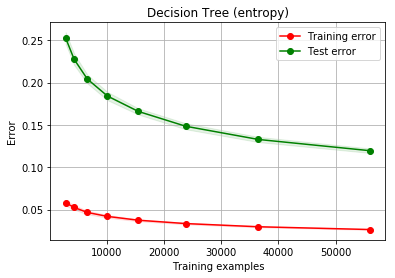

In [10]:
estimator = tree.DecisionTreeClassifier(criterion='entropy',
                                        min_samples_split=2, 
                                        min_samples_leaf=3,
                                        class_weight=None)

tick = time.time()
train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=4, train_sizes=train_sizes)
tock = time.time()
print('Decision Tree with entropy criterion executed in {} seconds'.format(tock-tick))

plot_curve(train_sizes, train_scores, test_scores,
           title="Decision Tree (entropy)")

Bernoulli executed in 188.38638520240784 seconds


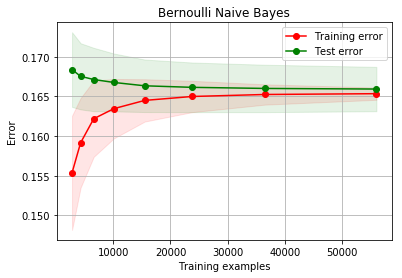

In [11]:
estimator = BernoulliNB(alpha=0.1, binarize=8.0, fit_prior=True)

tick = time.time()
train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=4, train_sizes=train_sizes)
tock = time.time()
print('Bernoulli executed in {} seconds'.format(tock-tick))

plot_curve(train_sizes, train_scores, test_scores, 
           title="Bernoulli Naive Bayes")